# Get forecast for a specific spot

In [174]:
%load_ext autoreload
%autoreload 2
import requests
import matplotlib.pyplot as plt
import matplotlib
import matplotlib.dates as mdates
import datetime
import pandas as pd

from pysurfline import SpotForecast

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [175]:
type="wave"
params="spotId=584204204e65fad6a7709b09"
baseurl=f"https://services.surfline.com/kbyg/spots/forecasts/{type}?{params}"
r = requests.get(baseurl)

In [176]:
f=SpotForecast(r.json())

In [177]:
f.location

{'lon': 8.577, 'lat': 44.358}

In [178]:
waves=f.get_dataframe("wave")
waves.head()

,timestamp,utcOffset,surf_min,surf_max,surf_optimalScore,swells
0,2022-02-12 00:00:00,1,0.06,0.36,0,"[{'height': 0.43157, 'period': 4, 'direction':..."
1,2022-02-12 01:00:00,1,0.04,0.34,0,"[{'height': 0, 'period': 0, 'direction': 0, 'd..."
2,2022-02-12 02:00:00,1,0.00,0.30,0,"[{'height': 0, 'period': 0, 'direction': 0, 'd..."
3,2022-02-12 03:00:00,1,0.00,0.27,0,"[{'height': 0, 'period': 0, 'direction': 0, 'd..."
4,2022-02-12 04:00:00,1,0.00,0.23,0,"[{'height': 0, 'period': 0, 'direction': 0, 'd..."


In [195]:
surf=waves.copy()[["timestamp","surf_min",	"surf_max"]]
surf["timestamp"]=pd.to_datetime(surf["timestamp"],yearfirst=True)
surf=surf.set_index("timestamp").resample("3H").mean()
days=7
surf=surf.loc[:surf.index[0]+datetime.timedelta(days=7)]
surf.head()

,surf_min,surf_max
timestamp,,
2022-02-12 00:00:00,0.033333,0.333333
2022-02-12 03:00:00,0.000000,0.233333
2022-02-12 06:00:00,0.000000,0.133333
2022-02-12 09:00:00,0.000000,0.046667
2022-02-12 12:00:00,0.000000,0.106667


In [196]:
surf.index[0]

Timestamp('2022-02-12 00:00:00', freq='3H')

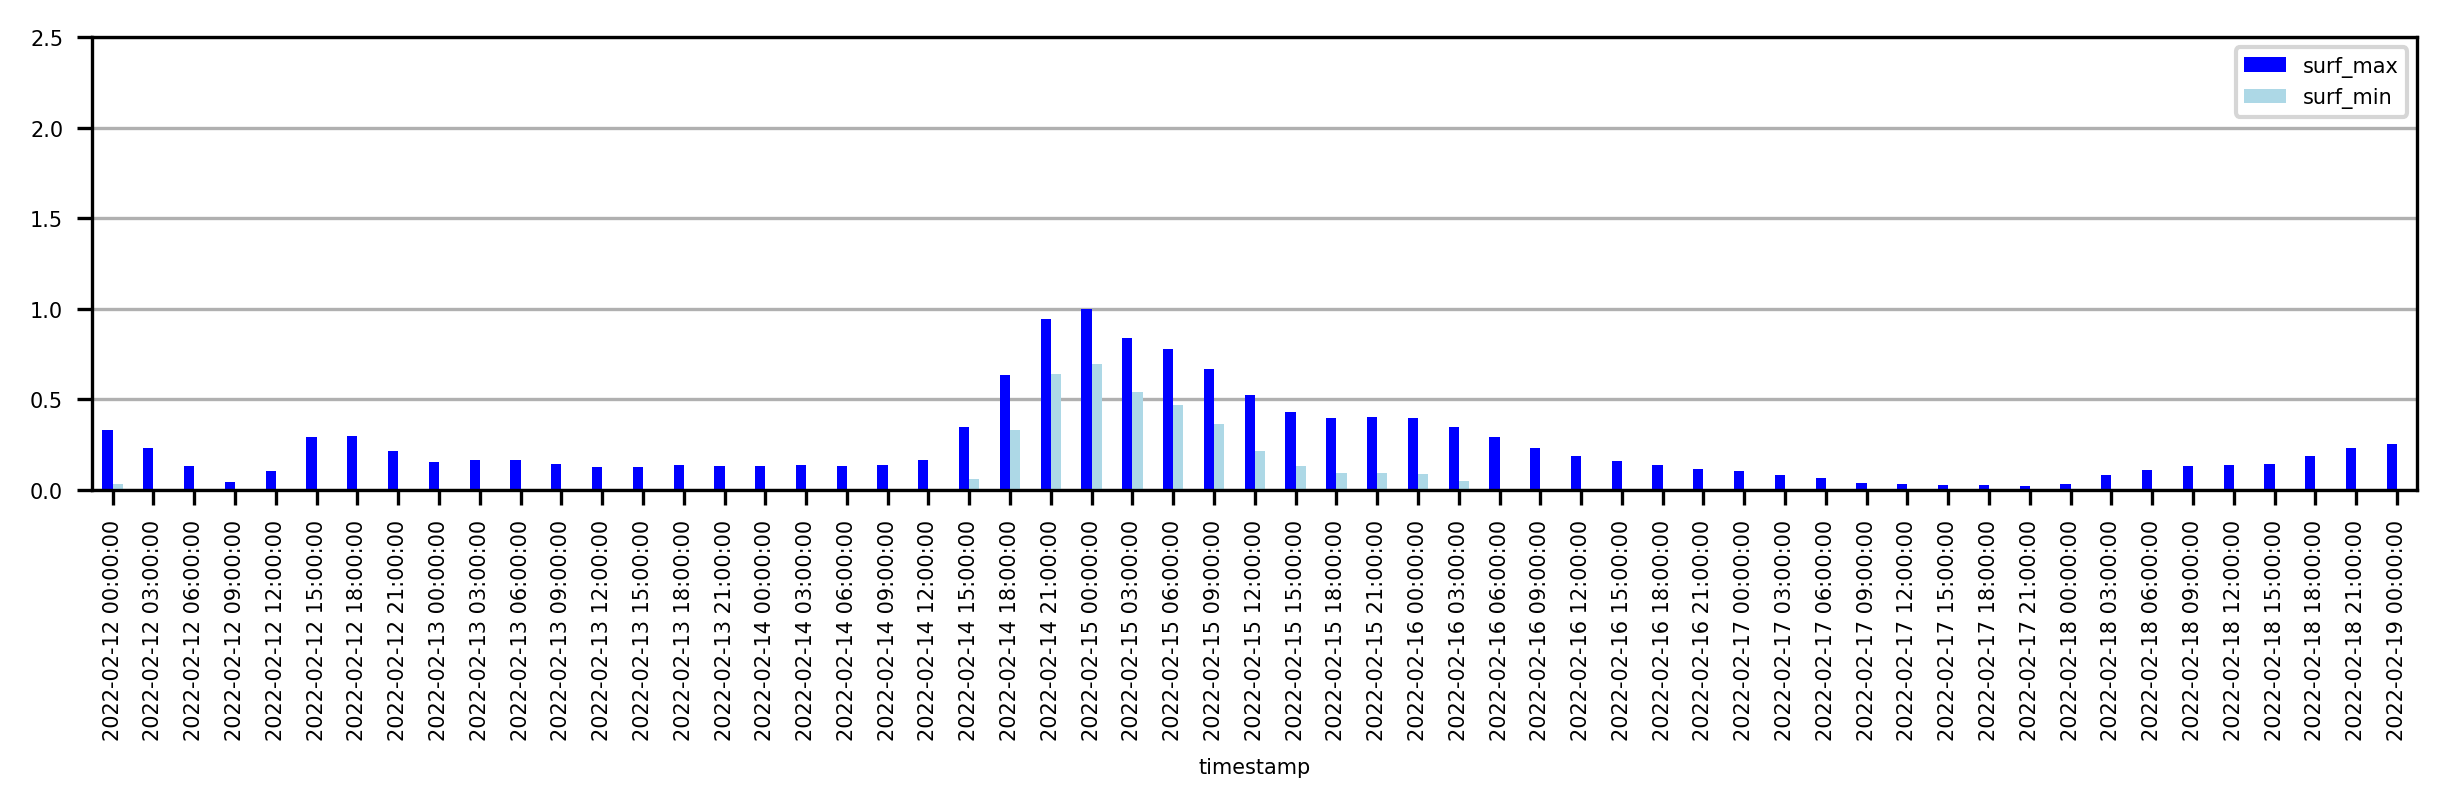

In [199]:
matplotlib.rcParams.update({'font.size': 5})
f,ax=plt.subplots(figsize=(10,2),dpi=300)
surf.plot.bar(y=["surf_max","surf_min"],color=["blue","lightblue"],ax=ax,zorder=2)
# ax.xaxis.set_major_locator(mdates.DayLocator())
# ax.xaxis.set_minor_locator(mdates.DayLocator())
# ax.xaxis.set_major_formatter(
#     mdates.DateFormatter("%d-%m"))
# ax.xaxis.set_major_formatter(mdates.DateFormatter('))
ax.set_ylim([0,2.5])
ax.grid(axis="y",zorder=0)
